In [11]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
X, y = datasets.make_blobs(n_samples=150,n_features=2,
                           centers=2,cluster_std=1.05,
                           random_state=2)
#creamos bolas con 150 muestras, 2columnas, 2 centros, desviacion


In [5]:
fig = plt.figure(figsize=(10,8))#tamano del grafico

<Figure size 1000x800 with 0 Axes>

In [7]:
print("en x:")
print(X)

en x:
[[-5.32783010e-01 -1.64847081e+00]
 [-5.50226372e-01 -1.16166152e+01]
 [ 1.38862276e+00 -1.43580590e+00]
 [ 1.37033956e+00 -6.40220712e-01]
 [-8.80606388e-01 -9.70946740e+00]
 [-2.22746033e+00 -1.01019963e+01]
 [-3.83660791e+00 -9.36311253e+00]
 [-2.61500332e-01 -1.80587922e+00]
 [ 1.18267985e+00 -7.12729660e-01]
 [-8.91135194e-01 -8.05385981e+00]
 [-3.42244116e+00 -9.43290706e+00]
 [-3.24159714e+00 -7.66373146e+00]
 [-8.14411765e-02 -1.76413571e+00]
 [ 2.82215236e+00 -1.76342807e+00]
 [ 1.90632766e+00 -2.43499725e+00]
 [ 1.12041042e+00 -2.18272234e+00]
 [ 4.12652646e-01 -9.79048994e-01]
 [-1.61986103e+00 -9.03645942e+00]
 [ 1.24676117e+00 -7.71255216e-01]
 [-2.01362140e+00 -1.04568119e+01]
 [-6.48510353e-01 -9.47763290e+00]
 [ 1.90763236e+00 -6.71105011e-01]
 [-7.57264801e-01 -9.34864598e+00]
 [ 2.18263294e+00 -9.04732063e-01]
 [ 1.53216357e+00 -1.64513848e+00]
 [ 1.12431439e+00 -4.99224897e-01]
 [ 1.19440189e+00 -1.98887161e+00]
 [-2.43377785e+00 -7.81776395e+00]
 [ 3.50550070e

In [8]:
print("en y:")
print(y)

en y:
[1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1
 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1
 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0
 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0
 1 1]


In [18]:
df=pd.DataFrame(columns=["feature1","feature2","clase"])

In [20]:
df["feature1"]=X[:,0]
df["feature2"]=X[:,1]
df["clase"]=y

In [21]:
print(df)

     feature1   feature2  clase
0   -0.532783  -1.648471      1
1   -0.550226 -11.616615      0
2    1.388623  -1.435806      1
3    1.370340  -0.640221      1
4   -0.880606  -9.709467      0
..        ...        ...    ...
145 -0.714091 -10.107443      0
146  0.260170  -1.041603      1
147 -2.352587  -9.027460      0
148  1.690682  -0.521923      1
149  0.695554  -0.728207      1

[150 rows x 3 columns]


Text(0.5, 1.0, 'Random Classification Data with 2 classes')

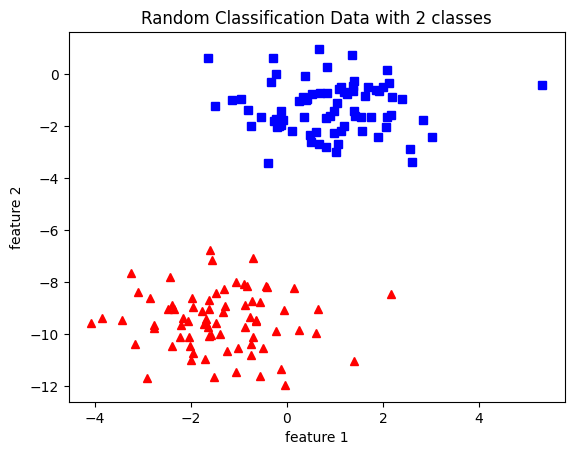

In [23]:
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')#cero en clase, primer atributo y segundo atributo
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')#uno en clase
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

In [24]:
def step_func(z):#si superior a 0 devuelve 1
        return 1.0 if (z > 0) else 0.0

In [25]:
def perceptron(X, y, lr, epochs):
    
    # X --> Inputs.
    # y --> labels/target.
    # lr --> learning rate.
    # epochs --> Number of iterations.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing parapeters(theta) to zeros.
    # +1 in n+1 for the bias term.
    theta = np.zeros((n+1,1))
    
    # Empty list to store how many examples were 
    # misclassified at every iteration.
    n_miss_list = []
    
    # Training.
    for epoch in range(epochs):
        
        # variable to store #misclassified.
        n_miss = 0
        
        # looping for every example.
        for idx, x_i in enumerate(X):
            
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            
            # Calculating prediction/hypothesis.
            y_hat = step_func(np.dot(x_i.T, theta))
            
            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                theta += lr*((y[idx] - y_hat)*x_i)
                
                # Incrementing by 1.
                n_miss += 1
        
        # Appending number of misclassified examples
        # at every iteration.
        n_miss_list.append(n_miss)
        
    return theta, n_miss_list

In [26]:
def plot_decision_boundary(X, theta):
    
    # X --> Inputs
    # theta --> parameters
    
    # The Line is y=mx+c
    # So, Equate mx+c = theta0.X0 + theta1.X1 + theta2.X2
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title("Perceptron Algorithm")
    plt.plot(x1, x2, 'y-')


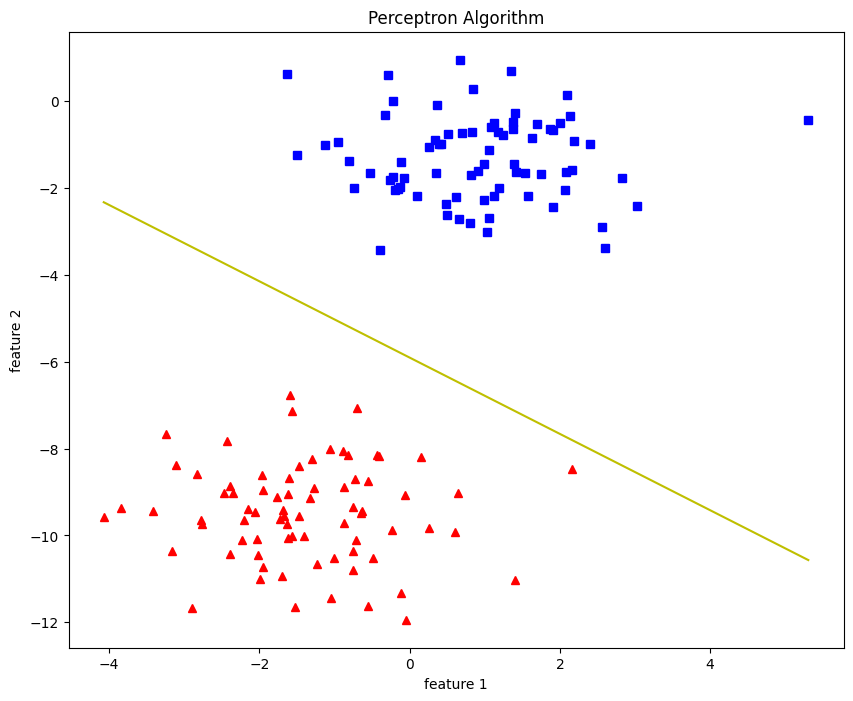

In [27]:
theta, miss_l = perceptron(X, y, 0.5, 100)
plot_decision_boundary(X, theta)